In [24]:
"""
Demo 04: Sequence Padding and Masking

This demo shows trainees how to:
1. Handle variable-length sequences
2. Apply padding strategies (pre vs post)
3. Use masking to ignore padding
4. Build robust preprocessing pipelines

Learning Objectives:
- Understand why padding is necessary
- Choose appropriate padding strategies
- Implement masking for cleaner model training

References:
- Written Content: 04-handling-sequential-data.md
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

gpus = tf.config.list_physical_devices("GPU")
cpus = tf.config.list_physical_devices("CPU")

print("GPUs:", gpus)
print("CPUs:", cpus)


GPUs: []
CPUs: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [13]:

# ============================================================================
# PART 1: The Variable Length Problem
# ============================================================================

print("=" * 70)
print("PART 1: Why Padding is Necessary")
print("=" * 70)

print("""
Neural networks require fixed-size inputs.
But text varies wildly in length:

"Hi"                                     # 1 word
"I love NLP"                             # 3 words
"The quick brown fox jumps over lazy"    # 7 words

Can't create a batch with different sequence lengths!
Solution: PAD shorter sequences to match longest.
""")

# Variable length sequences
sequences = [
    [1, 2],                    # Length 2
    [3, 4, 5, 6],              # Length 4
    [7, 8, 9],                 # Length 3
    [10, 11, 12, 13, 14, 15]   # Length 6
]

print("Original sequences:")
for i, seq in enumerate(sequences):
    print(f"  Sequence {i+1}: {seq} (length: {len(seq)})")

PART 1: Why Padding is Necessary

Neural networks require fixed-size inputs.
But text varies wildly in length:

"Hi"                                     # 1 word
"I love NLP"                             # 3 words
"The quick brown fox jumps over lazy"    # 7 words

Can't create a batch with different sequence lengths!
Solution: PAD shorter sequences to match longest.

Original sequences:
  Sequence 1: [1, 2] (length: 2)
  Sequence 2: [3, 4, 5, 6] (length: 4)
  Sequence 3: [7, 8, 9] (length: 3)
  Sequence 4: [10, 11, 12, 13, 14, 15] (length: 6)


In [14]:

# ============================================================================
# PART 2: Padding Strategies
# ============================================================================

print("\n" + "=" * 70)
print("PART 2: Padding Strategies")
print("=" * 70)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pre-padding (default): Add zeros at the beginning
padded_pre = pad_sequences(sequences, padding='pre')
print("\nPRE-PADDING (default):")
print(f"Shape: {padded_pre.shape}")
print(padded_pre)
print("Zeros added at the BEGINNING")

# Post-padding: Add zeros at the end
padded_post = pad_sequences(sequences, padding='post')
print("\nPOST-PADDING:")
print(f"Shape: {padded_post.shape}")
print(padded_post)
print("Zeros added at the END")

# Explain when to use which
print("\n" + "-" * 50)
print("WHEN TO USE WHICH?")
print("-" * 50)
print("""
PRE-PADDING (padding='pre'):
  - Use for: Classification (many-to-one)
  - Why: RNN's final hidden state is right after real content
  - Sequence: [0, 0, 0, I, love, NLP] -> h_final based on "NLP"
  
POST-PADDING (padding='post'):
  - Use for: Sequence-to-sequence
  - Why: More intuitive alignment with outputs
  - Sequence: [I, love, NLP, 0, 0, 0]
  
Bidirectional models: Either works (sees both directions)
""")



PART 2: Padding Strategies

PRE-PADDING (default):
Shape: (4, 6)
[[ 0  0  0  0  1  2]
 [ 0  0  3  4  5  6]
 [ 0  0  0  7  8  9]
 [10 11 12 13 14 15]]
Zeros added at the BEGINNING

POST-PADDING:
Shape: (4, 6)
[[ 1  2  0  0  0  0]
 [ 3  4  5  6  0  0]
 [ 7  8  9  0  0  0]
 [10 11 12 13 14 15]]
Zeros added at the END

--------------------------------------------------
WHEN TO USE WHICH?
--------------------------------------------------

PRE-PADDING (padding='pre'):
  - Use for: Classification (many-to-one)
  - Why: RNN's final hidden state is right after real content
  - Sequence: [0, 0, 0, I, love, NLP] -> h_final based on "NLP"

POST-PADDING (padding='post'):
  - Use for: Sequence-to-sequence
  - Why: More intuitive alignment with outputs
  - Sequence: [I, love, NLP, 0, 0, 0]

Bidirectional models: Either works (sees both directions)




PART 3: Setting Maximum Length (maxlen)

maxlen=5:
[[ 0  0  1  2  3]
 [ 8  9 10 11 12]]
Long sequence truncated (kept last 5 tokens)

maxlen=5, truncating='post':
[[0 0 1 2 3]
 [4 5 6 7 8]]
Long sequence truncated (kept first 5 tokens)

--------------------------------------------------
CHOOSING maxlen
--------------------------------------------------

Sequence length distribution (simulated):
  50th percentile: 18 tokens
  75th percentile: 32 tokens
  90th percentile: 50 tokens
  95th percentile: 63 tokens
  99th percentile: 91 tokens

 Length distribution saved

RECOMMENDATION:
  Use 95th percentile as maxlen
  - Covers 95% of data without excessive padding
  - Very long sequences (outliers) are truncated

  Example: If 95th percentile = 100 tokens, set maxlen=100



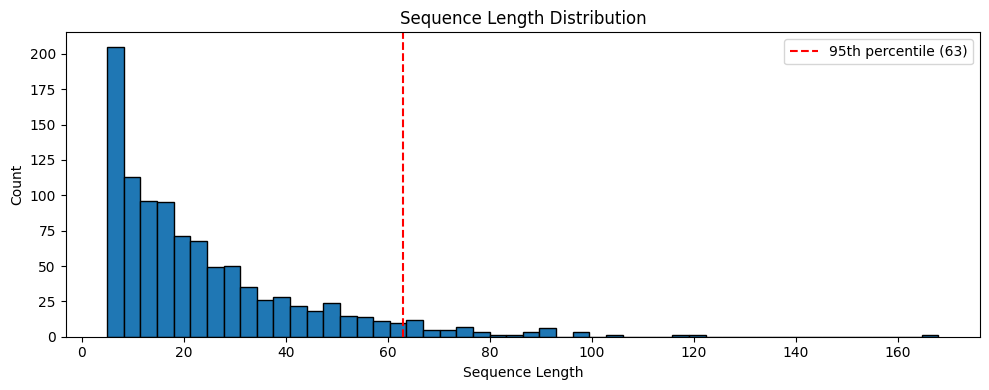

In [15]:
# ============================================================================
# PART 3: Setting maxlen
# ============================================================================

print("\n" + "=" * 70)
print("PART 3: Setting Maximum Length (maxlen)")
print("=" * 70)

# Truncate long sequences
long_sequences = [
    [1, 2, 3],                         # Length 3
    [4, 5, 6, 7, 8, 9, 10, 11, 12],    # Length 9 (will be truncated)
]

# Truncate to maxlen=5
padded_truncated = pad_sequences(long_sequences, maxlen=5)
print(f"\nmaxlen=5:")
print(padded_truncated)
print("Long sequence truncated (kept last 5 tokens)")

# Truncate from end
padded_truncate_post = pad_sequences(long_sequences, maxlen=5, truncating='post')
print(f"\nmaxlen=5, truncating='post':")
print(padded_truncate_post)
print("Long sequence truncated (kept first 5 tokens)")

# Choosing maxlen
print("\n" + "-" * 50)
print("CHOOSING maxlen")
print("-" * 50)

# Simulate sequence length distribution
np.random.seed(42)
simulated_lengths = np.random.exponential(scale=20, size=1000).astype(int) + 5
simulated_lengths = np.clip(simulated_lengths, 5, 200)

percentiles = [50, 75, 90, 95, 99]
print("\nSequence length distribution (simulated):")
for p in percentiles:
    val = np.percentile(simulated_lengths, p)
    print(f"  {p}th percentile: {val:.0f} tokens")

# Visualize distribution
plt.figure(figsize=(10, 4))
plt.hist(simulated_lengths, bins=50, edgecolor='black')
plt.axvline(np.percentile(simulated_lengths, 95), color='red', linestyle='--', 
            label=f'95th percentile ({np.percentile(simulated_lengths, 95):.0f})')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Sequence Length Distribution')
plt.legend()
plt.tight_layout()
plt.savefig('sequence_length_dist.png', dpi=150)
print("\n Length distribution saved")

print("""
RECOMMENDATION:
  Use 95th percentile as maxlen
  - Covers 95% of data without excessive padding
  - Very long sequences (outliers) are truncated
  
  Example: If 95th percentile = 100 tokens, set maxlen=100
""")

In [21]:

# ============================================================================
# PART 4: Masking
# ============================================================================

print("\n" + "=" * 70)
print("PART 4: Masking Padded Values")
print("=" * 70)

print("""
Problem: Padding tokens (0s) shouldn't influence model!

Without masking:
  Sequence: [42, 15, 89, 0, 0, 0]
  LSTM processes ALL positions, including 0s
  Padding contributes to hidden state (noise!)

With masking:
  LSTM skips positions where mask=False
  Only processes real tokens
""")

# Create model without masking
model_no_mask = keras.Sequential([
    layers.Embedding(1000, 32, input_length=10),  # No mask_zero
    layers.LSTM(16),
    layers.Dense(1, activation='sigmoid')
])

# Create model with masking
model_with_mask = keras.Sequential([
    layers.Embedding(1000, 32, input_length=10, mask_zero=True),  # Masking enabled
    layers.LSTM(16),
    layers.Dense(1, activation='sigmoid')
])

print("\nWithout mask_zero:")
print(f"  LSTM processes all 10 time steps")
print(f"  Padding (0s) contributes to hidden state")

print("\nWith mask_zero=True:")
print(f"  Embedding creates mask: [True, True, True, False, False, ...]")
print(f"  LSTM skips False positions")
print(f"  Cleaner, more accurate hidden states")

# Demonstrate mask creation
sample_sequence = tf.constant([[5, 3, 8, 0, 0]])

embedding_no_mask = layers.Embedding(1000, 32)
embedding_with_mask = layers.Embedding(1000, 32, mask_zero=True)

_ = embedding_no_mask(sample_sequence)
_ = embedding_with_mask(sample_sequence)

print(f"\nSample sequence: {sample_sequence.numpy()[0]}")
print(f"Mask (from mask_zero=True): {embedding_with_mask.compute_mask(sample_sequence).numpy()[0]}")



PART 4: Masking Padded Values

Problem: Padding tokens (0s) shouldn't influence model!

Without masking:
  Sequence: [42, 15, 89, 0, 0, 0]
  LSTM processes ALL positions, including 0s
  Padding contributes to hidden state (noise!)

With masking:
  LSTM skips positions where mask=False
  Only processes real tokens


Without mask_zero:
  LSTM processes all 10 time steps
  Padding (0s) contributes to hidden state

With mask_zero=True:
  Embedding creates mask: [True, True, True, False, False, ...]
  LSTM skips False positions
  Cleaner, more accurate hidden states

Sample sequence: [5 3 8 0 0]
Mask (from mask_zero=True): [ True  True  True False False]


In [22]:

# ============================================================================
# PART 5: Complete Preprocessing Pipeline
# ============================================================================

print("\n" + "=" * 70)
print("PART 5: Complete Preprocessing Pipeline")
print("=" * 70)

from tensorflow.keras.preprocessing.text import Tokenizer

class TextPreprocessor:
    """Complete text preprocessing pipeline"""
    
    def __init__(self, vocab_size=10000, max_length=100, padding='pre'):
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.padding = padding
        self.tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
        self.is_fitted = False
    
    def fit(self, texts):
        """Build vocabulary from texts"""
        self.tokenizer.fit_on_texts(texts)
        self.is_fitted = True
        print(f"Vocabulary built: {len(self.tokenizer.word_index)} unique words")
        print(f"Using top {self.vocab_size} words")
    
    def transform(self, texts):
        """Convert texts to padded sequences"""
        if not self.is_fitted:
            raise ValueError("Must fit before transform!")
        
        sequences = self.tokenizer.texts_to_sequences(texts)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding=self.padding)
        return padded
    
    def fit_transform(self, texts):
        """Fit and transform in one call"""
        self.fit(texts)
        return self.transform(texts)
    
    def get_config(self):
        """Get configuration for reproducibility"""
        return {
            'vocab_size': self.vocab_size,
            'max_length': self.max_length,
            'padding': self.padding,
            'actual_vocab_size': len(self.tokenizer.word_index) if self.is_fitted else None
        }

# Demonstrate pipeline
texts = [
    "I love deep learning and NLP",
    "This is a great course",
    "Machine learning is fascinating",
    "Natural language processing with neural networks",
    "AI is transforming the world"
]

preprocessor = TextPreprocessor(vocab_size=100, max_length=10, padding='pre')
X = preprocessor.fit_transform(texts)

print(f"\nPreprocessor config: {preprocessor.get_config()}")
print(f"\nOriginal texts and sequences:")
for text, seq in zip(texts, X):
    print(f"  '{text}'")
    print(f"    -> {seq}")



PART 5: Complete Preprocessing Pipeline
Vocabulary built: 24 unique words
Using top 100 words

Preprocessor config: {'vocab_size': 100, 'max_length': 10, 'padding': 'pre', 'actual_vocab_size': 24}

Original texts and sequences:
  'I love deep learning and NLP'
    -> [0 0 0 0 4 5 6 3 7 8]
  'This is a great course'
    -> [ 0  0  0  0  0  9  2 10 11 12]
  'Machine learning is fascinating'
    -> [ 0  0  0  0  0  0 13  3  2 14]
  'Natural language processing with neural networks'
    -> [ 0  0  0  0 15 16 17 18 19 20]
  'AI is transforming the world'
    -> [ 0  0  0  0  0 21  2 22 23 24]


In [18]:

# ============================================================================
# PART 6: Batch Processing Considerations
# ============================================================================

print("\n" + "=" * 70)
print("PART 6: Batch Processing Considerations")
print("=" * 70)

print("""
When creating batches:
1. All sequences in a batch must have same length
2. Global padding: Pad all to fixed maxlen (simple but wasteful)
3. Bucket batching: Group similar lengths, pad within bucket (efficient)

For most cases, global padding is fine.
For very long documents (1000+ tokens), consider bucketing.
""")

# Simulate efficiency comparison
maxlen_values = [50, 100, 200, 500]
avg_length = 50

print("\nMemory usage comparison (batch_size=32, embed_dim=128):")
for maxlen in maxlen_values:
    # Assuming half the maxlen is padding on average
    total_elements = 32 * maxlen * 128
    padding_ratio = (maxlen - avg_length) / maxlen
    print(f"  maxlen={maxlen}: {total_elements:,} elements, ~{padding_ratio*100:.0f}% padding")



PART 6: Batch Processing Considerations

When creating batches:
1. All sequences in a batch must have same length
2. Global padding: Pad all to fixed maxlen (simple but wasteful)
3. Bucket batching: Group similar lengths, pad within bucket (efficient)

For most cases, global padding is fine.
For very long documents (1000+ tokens), consider bucketing.


Memory usage comparison (batch_size=32, embed_dim=128):
  maxlen=50: 204,800 elements, ~0% padding
  maxlen=100: 409,600 elements, ~50% padding
  maxlen=200: 819,200 elements, ~75% padding
  maxlen=500: 2,048,000 elements, ~90% padding


In [19]:

# ============================================================================
# PART 7: Common Pitfalls
# ============================================================================

print("\n" + "=" * 70)
print("PART 7: Common Pitfalls")
print("=" * 70)

print("""
1. DIFFERENT PADDING FOR TRAIN/TEST
   WRONG:
     X_train = pad_sequences(train, padding='pre')
     X_test = pad_sequences(test, padding='post')  # Different!
   
   RIGHT:
     Use same padding strategy for both!

2. FITTING TOKENIZER ON TEST DATA
   WRONG:
     tokenizer.fit_on_texts(train_texts + test_texts)  # Data leakage!
   
   RIGHT:
     tokenizer.fit_on_texts(train_texts)  # Fit only on training

3. FORGETTING TO PAD TEST DATA
   WRONG:
     X_train = pad_sequences(train_seq, maxlen=100)
     X_test = test_seq  # Not padded!
   
   RIGHT:
     X_train = pad_sequences(train_seq, maxlen=100)
     X_test = pad_sequences(test_seq, maxlen=100)  # Same maxlen!

4. NOT USING MASKING
   Consider: mask_zero=True in Embedding layer
   Especially important for variable-length sequences
""")



PART 7: Common Pitfalls

1. DIFFERENT PADDING FOR TRAIN/TEST
   WRONG:
     X_train = pad_sequences(train, padding='pre')
     X_test = pad_sequences(test, padding='post')  # Different!

   RIGHT:
     Use same padding strategy for both!

2. FITTING TOKENIZER ON TEST DATA
   WRONG:
     tokenizer.fit_on_texts(train_texts + test_texts)  # Data leakage!

   RIGHT:
     tokenizer.fit_on_texts(train_texts)  # Fit only on training

3. FORGETTING TO PAD TEST DATA
   WRONG:
     X_train = pad_sequences(train_seq, maxlen=100)
     X_test = test_seq  # Not padded!

   RIGHT:
     X_train = pad_sequences(train_seq, maxlen=100)
     X_test = pad_sequences(test_seq, maxlen=100)  # Same maxlen!

4. NOT USING MASKING
   Consider: mask_zero=True in Embedding layer
   Especially important for variable-length sequences



In [20]:

# ============================================================================
# DEMO SUMMARY
# ============================================================================

print("\n" + "=" * 70)
print("DEMO COMPLETE: Sequence Padding and Masking")
print("=" * 70)

print("\nKey Takeaways:")
print("1. Padding makes variable-length sequences uniform")
print("2. Pre-padding: Best for classification")
print("3. Post-padding: Best for seq2seq")
print("4. maxlen: Use 95th percentile of length distribution")
print("5. mask_zero=True: Ignore padding in LSTM/GRU")
print("6. Consistent preprocessing between train and test")

print("\nBest Practices:")
print("- Analyze sequence length distribution first")
print("- Build reusable preprocessing pipeline")
print("- Always use masking with variable-length sequences")
print("- Test that train/test preprocessing is identical")

print("\n" + "=" * 70)




DEMO COMPLETE: Sequence Padding and Masking

Key Takeaways:
1. Padding makes variable-length sequences uniform
2. Pre-padding: Best for classification
3. Post-padding: Best for seq2seq
4. maxlen: Use 95th percentile of length distribution
5. mask_zero=True: Ignore padding in LSTM/GRU
6. Consistent preprocessing between train and test

Best Practices:
- Analyze sequence length distribution first
- Build reusable preprocessing pipeline
- Always use masking with variable-length sequences
- Test that train/test preprocessing is identical

